The `EXPLAIN` statement is sort of a dry run of your query or the blueprint/plan of how the server plans to execute your query. Generally, when complicated queries exhibit performance degradation, we can use the `EXPLAIN` statement to seek and identify bottlenecks. This lesson is not a comprehensive treatment of query optimization; rather just a light and general introduction to a vast subject.

> Note that `EXPLAIN` and `DESCRIBE` are synonyms; however, as a convention, `EXPLAIN` is used with queries, whereas DESCRIBE is used with structures.

**SYNTAX**:

```mysql
EXPLAIN <SQL Statement>;

DESCRIBE <SQL Statement>;
```

---

**EXAMPLE**:

Let’s see what the server output does when `EXPLAIN` is used with a simple select-all statement as follows:

```mysql
EXPLAIN SELECT * FROM Actors;
```

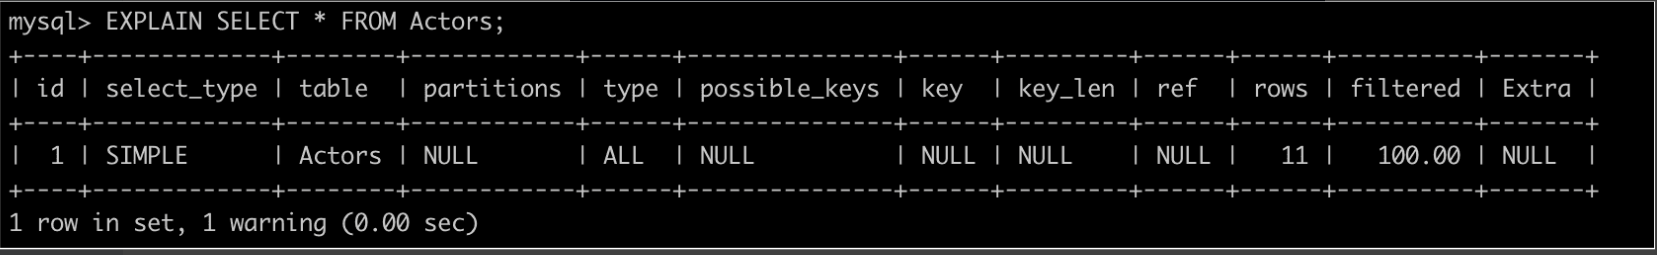

The output is a table with different columns. 

Let’s see what each column means:

* `id`: This is the sequential number of the SELECT within the query.
* `select_type`:
    * This is the type of selection.
    * For instance, it can be listed as SIMPLE if it doesn’t involve any queries.
    * It can be PRIMARY if it’s the outermost select.
    * There are also other values.
    * For a complete list, see **[this](https://dev.mysql.com/doc/refman/8.0/en/explain-output.html)**.
* `table`:
    * The name of the table the rows come from.
    * The value can also be derived if the table comes from a subquery in the FROM clause.
* `partitions`:
    * The partitions from which records would be matched by the query.
    * We don’t discuss partitioned tables in this course, and this value will always be NULL for our queries.
* `type`: The type of join.
* `possible_keys`:
    * This is one of the most useful pieces of information.
    * It indicates the indexes from which MySQL can choose to find the rows in this table.
    * If it is `NULL`, it implies there are no relevant indexes.
    * It also presents an opportunity to add an index based on the columns used in the `WHERE` clause on a slow-running query to improve execution time.
* `key`:
    * The key column indicates the key (index) that MySQL actually decided to use.
    * If MySQL decides to use one of the possible_keys indexes to look up rows, that index is listed as the key-value
* `key_len`: The key_len column indicates the length of the key that MySQL decided to use.
* `ref`: The ref column shows which columns or constants are compared to the index named in the key column to select rows from the table.
* `rows`: Refers to the number of rows MySQL believes it must examine to execute the query.
* `filtered`:
    * The filtered column indicates an estimated percentage of table rows that will be filtered by the table condition.
    * The maximum value is 100, which means no filtering of rows occurred.
* `Extra`: This column contains additional information about how MySQL resolves the query.


Now we can discuss the output of the `EXPLAIN` statement. 
* The `select_type` is SIMPLE, and no index is used in resolving the query.
* Furthermore, since MySQL estimates it will need to scan all eleven rows, and none of the rows will be filtered.

Now we’ll slightly tweak our query and select the **ID** column, which is also the primary key of the **Actors** table.

```mysql
DESCRIBE SELECT Id FROM Actors;
```

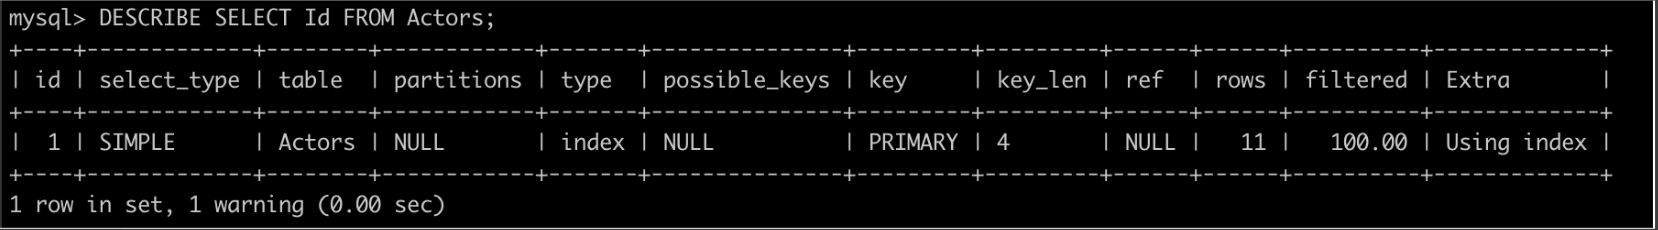

* Now MySQL says it will use the primary key to resolve the query. 
* Also, note we have used `DESCRIBE` instead of `EXPLAIN`.

Here’s another example of an inner join between the **DigitalAssets** and **Actors** tables.

```mysql
EXPLAIN
SELECT * 
FROM Actors INNER JOIN DigitalAssets
ON Id = ActorId;
```

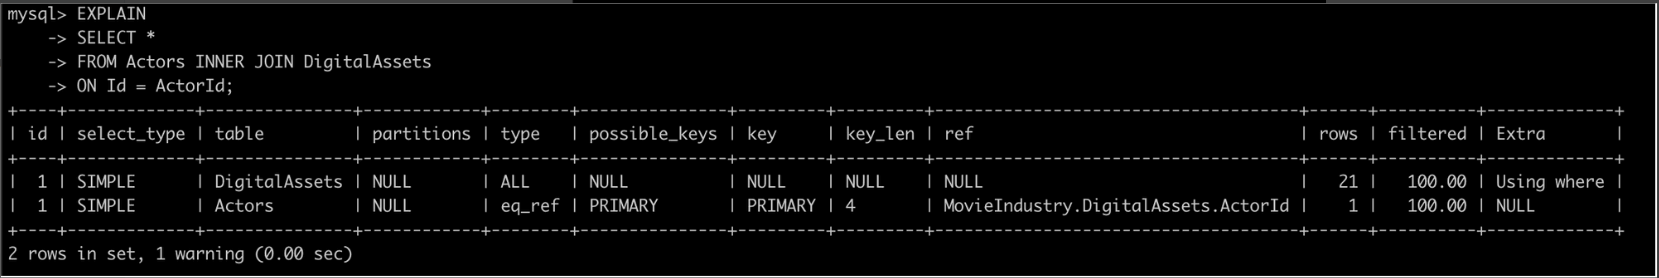